In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import matplotlib.patches as patches
import glob
import matplotlib.cm as cm
import matplotlib as mpl


import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap


from netCDF4 import Dataset
from scipy import stats

from matplotlib.animation import FuncAnimation

import geopandas as gpd
import geocube
from geocube.api.core import make_geocube
## estimate of pressure levels from the hybrid coordinate:
## lev0=975, 5=925, 8=850, 12=700, 17=500,  19=400, 21=300, 24=200, 29=100

path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/post_processing/'

# Questions remained: 
## Outside of IL, excessive energy caused by the reduction in reflected SW is balanced by an increase in LH. How come?

# Energy budget at the surface

### load data

In [2]:
with xarray.open_dataset(path+'Amazon961x801/energy.November.ensmean.tmean.ctrl.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
with xarray.open_dataset(path+'Amazon961x801/energy.November.ensmean.tmean.ILgrassland.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
lats=ds1['XLAT'][0,:,0]
lons=ds1['XLONG'][0,0,:]
lu1=ds1['LU_INDEX'][0,:,:]
lu0=ds0['LU_INDEX'][0,:,:]

ok
ok


## 1. change in ground flux (net radiation - LH - SH) is not small

## How big the is the ground flux in a daily mean sense vs local noon?

In [17]:
Rad0 = ds0['SWDNB']-ds0['SWUPB']+ds0['LWDNB']-ds0['LWUPB']
Rad1 = ds1['SWDNB']-ds1['SWUPB']+ds1['LWDNB']-ds1['LWUPB']
Rnet0 = ds0['HFX']+ds0['LH']
Rnet1 = ds1['HFX']+ds1['LH']

Rsoil0 = Rad0 - Rnet0
Rsoil1 = Rad1 - Rnet1

Rground0 = Rad0 - Rnet0
Rground1 = Rad1 - Rnet1

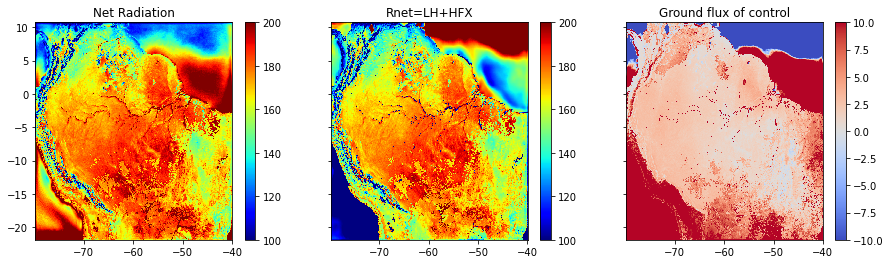

In [11]:
var='SWUPB'

fig,axes = plt.subplots(1,3,figsize=(15,4),sharex=True,sharey=True)
axes = axes.ravel()  

im = axes[0].pcolormesh(lons,lats,Rad0[:,:,:].mean(axis=0),cmap='jet',vmin=100,vmax=200)
fig.colorbar(im,ax=axes[0])

im = axes[1].pcolormesh(lons,lats,Rnet0[:,:,:].mean(axis=0),cmap='jet',vmin=100,vmax=200)
fig.colorbar(im,ax=axes[1])

im = axes[2].pcolormesh(lons,lats,Rad0[:,:,:].mean(axis=0)-Rnet0[:,:,:].mean(axis=0),cmap='coolwarm',vmin=-10,vmax=10)
fig.colorbar(im,ax=axes[2])

titles=['Net Radiation','Rnet=LH+HFX','Ground flux of control']
for ii in range(3):
    axes[ii].set_title(titles[ii])

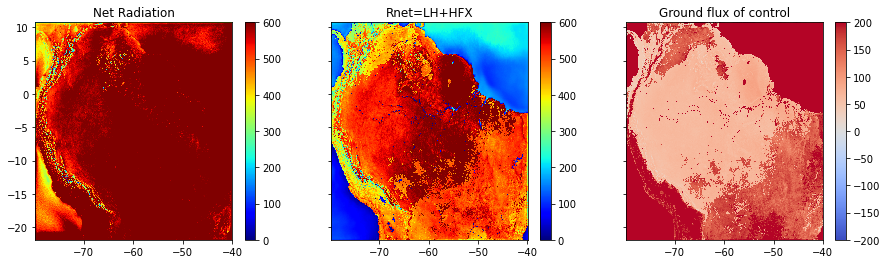

In [16]:
var='SWUPB'

fig,axes = plt.subplots(1,3,figsize=(15,4),sharex=True,sharey=True)
axes = axes.ravel()  

im = axes[0].pcolormesh(lons,lats,Rad0[15,:,:],cmap='jet',vmin=0,vmax=600)
fig.colorbar(im,ax=axes[0])

im = axes[1].pcolormesh(lons,lats,Rnet0[15,:,:],cmap='jet',vmin=0,vmax=600)
fig.colorbar(im,ax=axes[1])

im = axes[2].pcolormesh(lons,lats,Rad0[15,:,:]-Rnet0[15,:,:],cmap='coolwarm',vmin=-200,vmax=200)
fig.colorbar(im,ax=axes[2])

titles=['Net Radiation','Rnet=LH+HFX','Ground flux of control']
for ii in range(3):
    axes[ii].set_title(titles[ii])

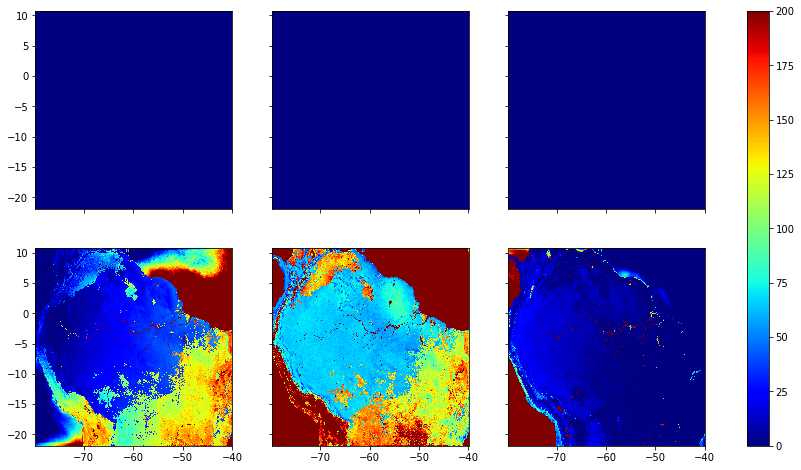

In [24]:
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  

for ii in range(6):
    im = axes[ii].pcolormesh(lons,lats,Rground0[ii*4,:,:],cmap='jet',vmin=0,vmax=200)
fig.colorbar(im,ax=axes[:6])

## 2. Change in energy at the surface
### Dominated by a large reduction in LH. This excessive energy is partly balanced by more outgoing LW. 
### Despite increase in surface albeo caused by deforestation, there is also a general increase in net radiation down. This is mainly associated with an increase in SW down at the surface, which in turn is related to decrease in reflected SW at TOA and decrease in atmosphere absorption. 

### Less reflected SW at TOA implies less low clouds. 

In [51]:
Rad_down0 = ds0['SWDNB']-ds0['SWUPB']+ds0['LWDNB']
Rad_down1 = ds1['SWDNB']-ds1['SWUPB']+ds1['LWDNB']
Rad0 = ds0['SWDNB']-ds0['SWUPB']+ds0['LWDNB']#-ds0['LWUPB']
Rad1 = ds1['SWDNB']-ds1['SWUPB']+ds1['LWDNB']#-ds1['LWUPB']
Rnet0 = ds0['HFX']+ds0['LH']
Rnet1 = ds1['HFX']+ds1['LH']

Rsoil0 = Rad0 - Rnet0
Rsoil1 = Rad1 - Rnet1

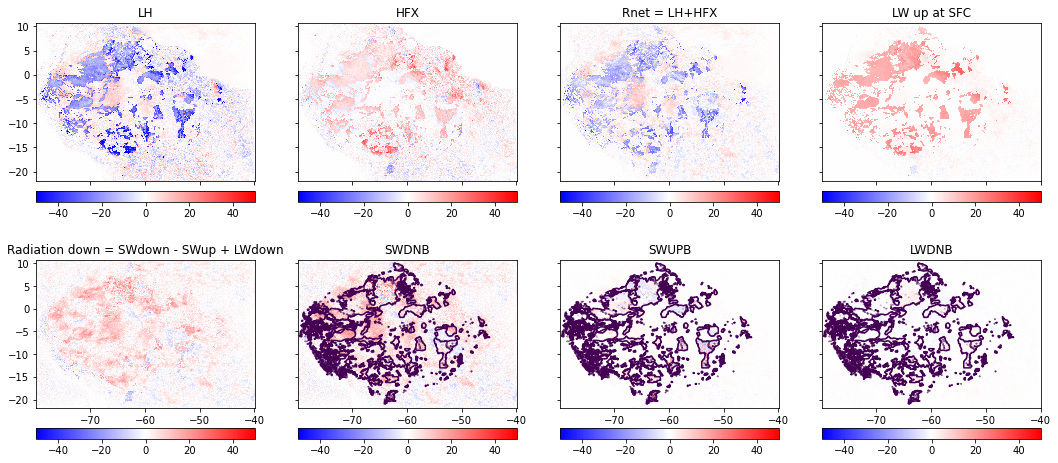

In [52]:
fig,axes = plt.subplots(2,4,figsize=(18,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX']
vmins = [-100,-100,-10,-0.05]
vmaxs = [100,100,10,0.05]
for ii in range(2):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]][0,:,:]-ds0[varname[ii]][0,:,:],cmap='bwr',
                             vmin=-50,vmax=50)
    fig.colorbar(img,ax=axes[ii],orientation='horizontal',pad=0.05)
    axes[ii].set_title(varname[ii])
    #axes[ii].contour(lons,lats,lu1-lu0,levels=[1]) 
###### Rnet = LH + HFX
img = axes[2].pcolormesh(lons,lats,Rnet1[0,:,:]-Rnet0[0,:,:],cmap='bwr',
                             vmin=-50,vmax=50)
fig.colorbar(img,ax=axes[2],orientation='horizontal',pad=0.05)
axes[2].set_title('Rnet = LH+HFX')

###### LW up at the surface
img = axes[3].pcolormesh(lons,lats,ds1['LWUPB'][0,:,:]-ds0['LWUPB'][0,:,:],cmap='bwr',
                             vmin=-50,vmax=50)
fig.colorbar(img,ax=axes[3],orientation='horizontal',pad=0.05)
axes[3].set_title('LW up at SFC')


### Net radiation at surface
varxs=['SWDNB','SWUPB','LWDNB',]#'SWUPT','LWUPT','LWDNB','LWUPB','LWDNT','LWDNB','LWUPB',
img = axes[4].pcolormesh(lons,lats,Rad_down1[0,:,:]- Rad_down0[0,:,:],cmap='bwr',
                             vmin=-50,vmax=50)
#axes[0].contour(lons,lats,lu1-lu0,levels=[1])     
fig.colorbar(img,ax=axes[4],orientation='horizontal',pad=0.1)
axes[4].set_title('Radiation down = SWdown - SWup + LWdown')

for ii in range(0,3):
    im = axes[ii+5].pcolormesh(lons,lats,ds1[varxs[ii]][0,:,:] - ds0[varxs[ii]][0,:,:],
                             cmap='bwr',vmin=-50,vmax=50)
    axes[ii+5].contour(lons,lats,lu1-lu0,levels=[1])
    axes[ii+5].set_title(varxs[ii])
    fig.colorbar(img,ax=axes[ii+5],orientation='horizontal',pad=0.1)

#fig.colorbar(im,ax=axes[:4],orientation='horizontal',label='W/m^2')

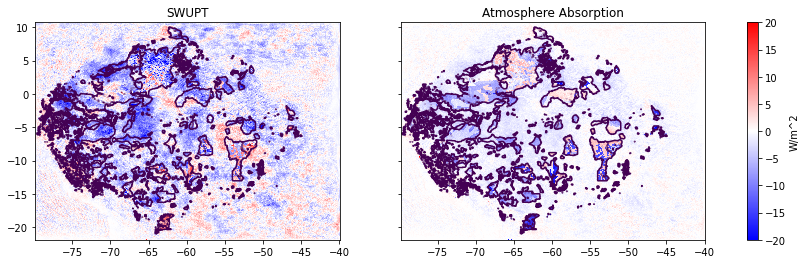

In [49]:
### Absorption by the atmosphere
Rabsorb1 = ds1['SWDNT']-ds1['SWUPT']-ds1['SWDNB']
Rabsorb0 = ds0['SWDNT']-ds0['SWUPT']-ds0['SWDNB']

fig,axes = plt.subplots(1,2,figsize=(15,4),sharex=True,sharey=True)
axes = axes.ravel()  

im = axes[0].pcolormesh(lons,lats,ds1['SWUPT'][0,:,:] - ds0['SWUPT'][0,:,:],
                         cmap='bwr',vmin=-20,vmax=20)
im = axes[1].pcolormesh(lons,lats,Rabsorb1[0,:,:] - Rabsorb0[0,:,:],
                         cmap='bwr',vmin=-20,vmax=20)
axes[0].contour(lons,lats,lu1-lu0,levels=[1])
axes[1].contour(lons,lats,lu1-lu0,levels=[1])

axes[0].set_title('SWUPT')
axes[1].set_title('Atmosphere Absorption')

fig.colorbar(im,ax=axes[:4],orientation='vertical',label='W/m^2')

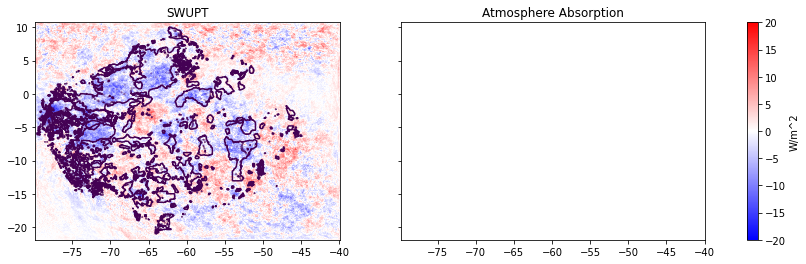

In [45]:
fig,axes = plt.subplots(1,2,figsize=(15,4),sharex=True,sharey=True)
axes = axes.ravel()  
clouds1 = ds1['OLR'][15,:,:] - ds1['LWUPTC'][15,:,:]
clouds0 = ds0['OLR'][15,:,:] - ds0['LWUPTC'][15,:,:]

im = axes[0].pcolormesh(lons,lats,clouds1 - clouds0,
                         cmap='bwr',vmin=-20,vmax=20)

axes[0].contour(lons,lats,lu1-lu0,levels=[1])
#axes[1].contour(lons,lats,lu1-lu0,levels=[1])

axes[0].set_title('SWUPT')
axes[1].set_title('Atmosphere Absorption')

fig.colorbar(im,ax=axes[:4],orientation='vertical',label='W/m^2')

### For local noon

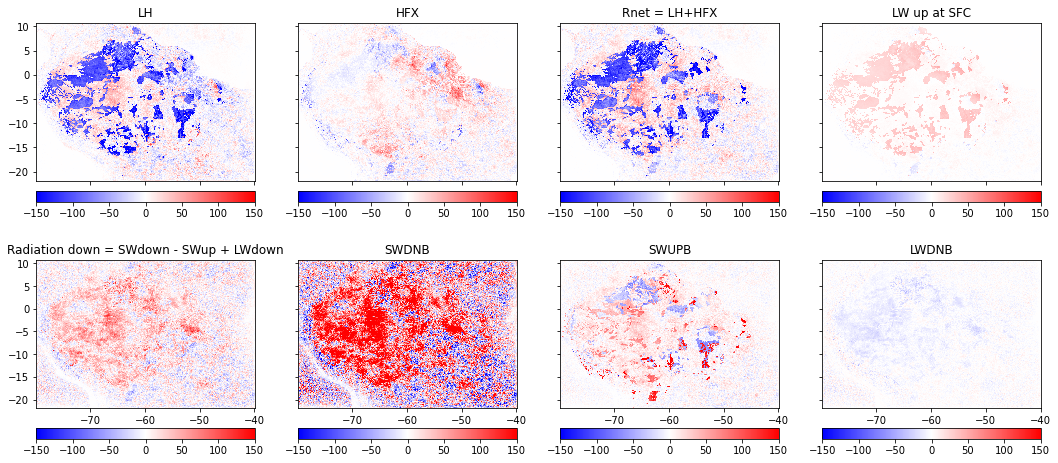

In [61]:
fig,axes = plt.subplots(2,4,figsize=(18,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX']
vmins = [-150,-150,-10,-0.05]
vmaxs = [150,150,10,0.05]
for ii in range(2):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]][15,:,:]-ds0[varname[ii]][15,:,:],cmap='bwr',
                             vmin=vmins[ii],vmax=vmaxs[ii])
    fig.colorbar(img,ax=axes[ii],orientation='horizontal',pad=0.05)
    axes[ii].set_title(varname[ii])
    #axes[ii].contour(lons,lats,lu1-lu0,levels=[1]) 
###### Rnet = LH + HFX
img = axes[2].pcolormesh(lons,lats,Rnet1[15,:,:]-Rnet0[15,:,:],cmap='bwr',
                             vmin=-150,vmax=150)
fig.colorbar(img,ax=axes[2],orientation='horizontal',pad=0.05)
axes[2].set_title('Rnet = LH+HFX')

###### LW up at the surface
img = axes[3].pcolormesh(lons,lats,ds1['LWUPB'][15,:,:]-ds0['LWUPB'][15,:,:],cmap='bwr',
                             vmin=-150,vmax=150)
fig.colorbar(img,ax=axes[3],orientation='horizontal',pad=0.05)
axes[3].set_title('LW up at SFC')


### Net radiation at surface
varxs=['SWDNB','SWUPB','LWDNB',]#'SWUPT','LWUPT','LWDNB','LWUPB','LWDNT','LWDNB','LWUPB',
vmins = [-50,-50,-50,-50,-150,-50]
vmaxs = [50,50,50,50,150,50]

img = axes[4].pcolormesh(lons,lats,Rad_down1[15,:,:]- Rad_down0[15,:,:],cmap='bwr',
                             vmin=-150,vmax=150)
#axes[0].contour(lons,lats,lu1-lu0,levels=[1])     
fig.colorbar(img,ax=axes[4],orientation='horizontal',pad=0.1)
axes[4].set_title('Radiation down = SWdown - SWup + LWdown')

for ii in range(0,3):
    im = axes[ii+5].pcolormesh(lons,lats,ds1[varxs[ii]][15,:,:] - ds0[varxs[ii]][15,:,:],
                             cmap='bwr',vmin=vmins[ii],vmax=vmaxs[ii])
    #axes[ii+1].contour(lons,lats,lu1-lu0,levels=[1])
    axes[ii+5].set_title(varxs[ii])
    fig.colorbar(img,ax=axes[ii+5],orientation='horizontal',pad=0.1)

#fig.colorbar(im,ax=axes[:4],orientation='horizontal',label='W/m^2')

## Decompose SW down at surface to SW up at TOA and absorption
#### Increase in SW down at the botoom is mainly due to decrease in reflected SW at TOA and also due to decrease in atmosphere absorption

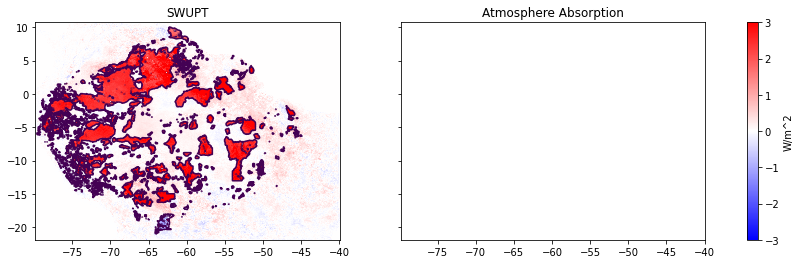

In [54]:
fig,axes = plt.subplots(1,2,figsize=(15,4),sharex=True,sharey=True)
axes = axes.ravel()  

im = axes[0].pcolormesh(lons,lats,ds1['TSK'][0,:,:] - ds0['TSK'][0,:,:],
                         cmap='bwr',vmin=-3,vmax=3)

axes[0].contour(lons,lats,lu1-lu0,levels=[1])
#axes[1].contour(lons,lats,lu1-lu0,levels=[1])

axes[0].set_title('SWUPT')
axes[1].set_title('Atmosphere Absorption')

fig.colorbar(im,ax=axes[:4],orientation='vertical',label='W/m^2')


# Do we need a bar plot to summarize the above?

# The decrease in reflected SW at TOA suggests fewer low clouds. 
# The decrease in absorption suggested drier atmosphere. 

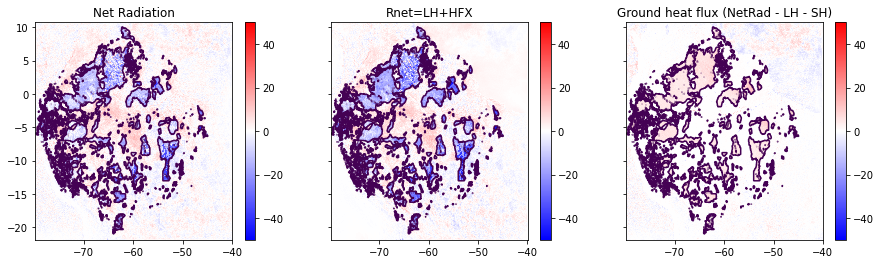

In [6]:
dif_Rnet = Rnet1.mean(axis=0) - Rnet0.mean(axis=0)
dif_Rad = Rad1.mean(axis=0) - Rad0.mean(axis=0)
dif_Rsoil = dif_Rad - dif_Rnet

fig,axes = plt.subplots(1,3,figsize=(15,4),sharex=True,sharey=True)
axes = axes.ravel()  

im = axes[0].pcolormesh(lons,lats,dif_Rad,cmap='bwr',vmin=-50,vmax=50)
fig.colorbar(im,ax=axes[0])

im = axes[1].pcolormesh(lons,lats,dif_Rnet,cmap='bwr',vmin=-50,vmax=50)
fig.colorbar(im,ax=axes[1])

im = axes[2].pcolormesh(lons,lats,dif_Rsoil,cmap='bwr',vmin=-50,vmax=50)
fig.colorbar(im,ax=axes[2])

titles=['Net Radiation','Rnet=LH+HFX','Ground heat flux (NetRad - LH - SH)']
for ii in range(3):
    axes[ii].set_title(titles[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])

## Why is there reduction in SWUPT? Changes in clouds as a response to deforestation? Check clouds and humidity. 

## Show SWUPT of every month and every member. 

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


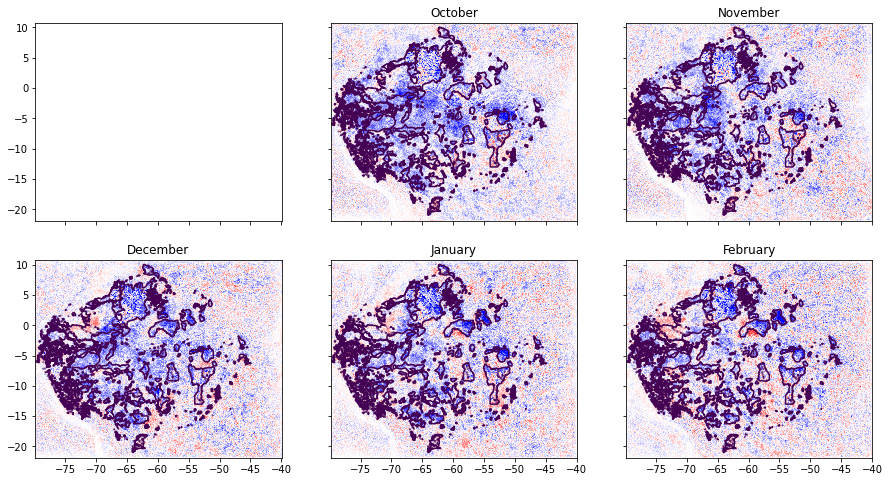

In [6]:
months=['September','October','November','December','January','February']

fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  

for ii in range(1,6):
    with xarray.open_dataset(path+'Amazon961x801/energy.'+months[ii]+'.ensmean.ctrl.nc',decode_times=False,
                             mask_and_scale='True') as ds0:
        print('ok')
    with xarray.open_dataset(path+'Amazon961x801/energy.'+months[ii]+'.ensmean.ILgrassland.nc',decode_times=False,
                             mask_and_scale='True') as ds1:
                             print('ok')

    im = axes[ii].pcolormesh(lons,lats,ds1['SWUPT'][15,:,:] - ds0['SWUPT'][15,:,:],
                             cmap='bwr',vmin=-100,vmax=100)
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])
    axes[ii].set_title(months[ii])

## Show SWUPT of every member. 

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


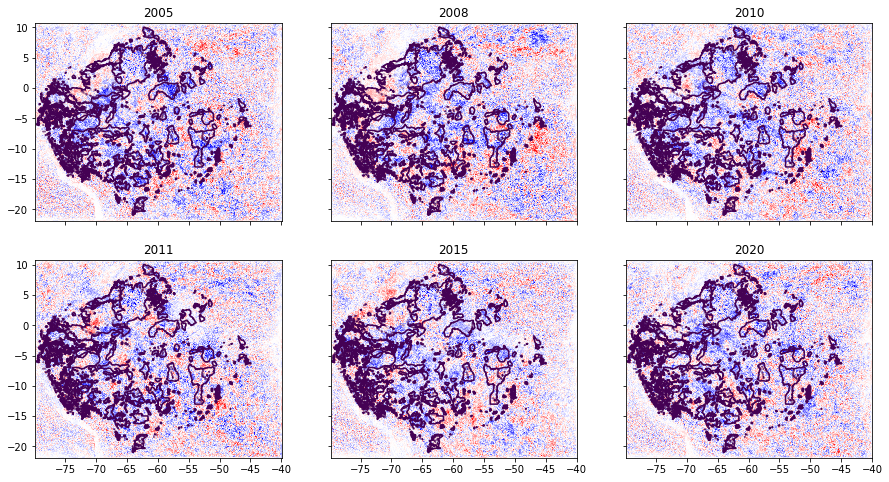

In [12]:
years=['2005','2008','2010','2011','2015','2020']
months=['September','October','November','December','January','February']

fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  

vmins = [-50,-50,-50,-50,-150,-50]
vmaxs = [50,50,50,50,150,50]

for ii in range(0,6):
    with xarray.open_dataset(path+'Amazon961x801/energy.'+years[ii]+'12.ctrl.nc',decode_times=False,
                             mask_and_scale='True') as ds0:
        print('ok')
    with xarray.open_dataset(path+'Amazon961x801/energy.'+years[ii]+'12.ILgrassland.nc',decode_times=False,
                             mask_and_scale='True') as ds1:
                             print('ok')

    im = axes[ii].pcolormesh(lons,lats,ds1['SWUPT'][15,:,:] - ds0['SWUPT'][15,:,:],
                             cmap='bwr',vmin=-190,vmax=190)
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])
    axes[ii].set_title(years[ii])

## Plot the winds

<ipython-input-22-6e6bd5d53a48>:7: UserWarning: The following kwargs were not used by contour: 'scale_units'
  plt.contour(lons,lats,lu1-lu0,levels=[1],scale_units='inches')


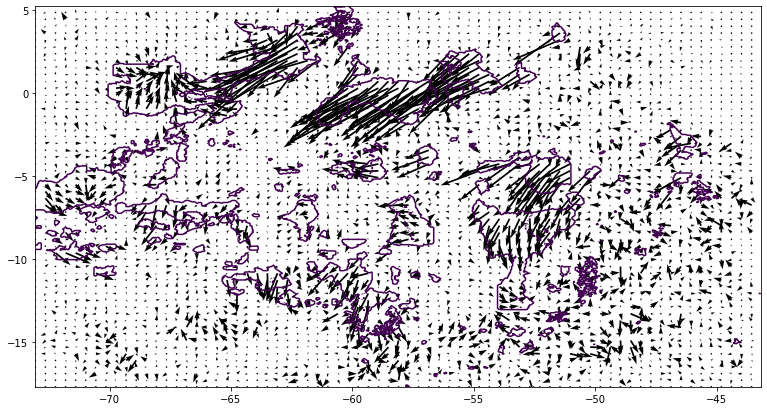

In [22]:
plt.figure(figsize=(13,7))
u10 = ds1['U10']-ds0['U10']
v10 = ds1['V10']-ds0['V10']
plt.quiver(lons[::10], lats[::10],
           u10[0,::10, ::10], v10[0,::10, ::10],
           cmap='jet')
plt.contour(lons,lats,lu1-lu0,levels=[1],scale_units='inches')


## 4. Relate 3 to clouds, surface temperature, and surface humidity etc. 

## Soil moisture

In [9]:
with xarray.open_dataset(path+'SMOIS.201409_201412.ILave.ctrl.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
    
with xarray.open_dataset(path+'SMOIS.201409_201412.ILave.ILgrassland.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
smois0_areaave = ds0['SMOIS']
smois1_areaave = ds1['SMOIS']

ok
ok


Text(0, 0.5, 'Soil Moisture [m3/m3]')

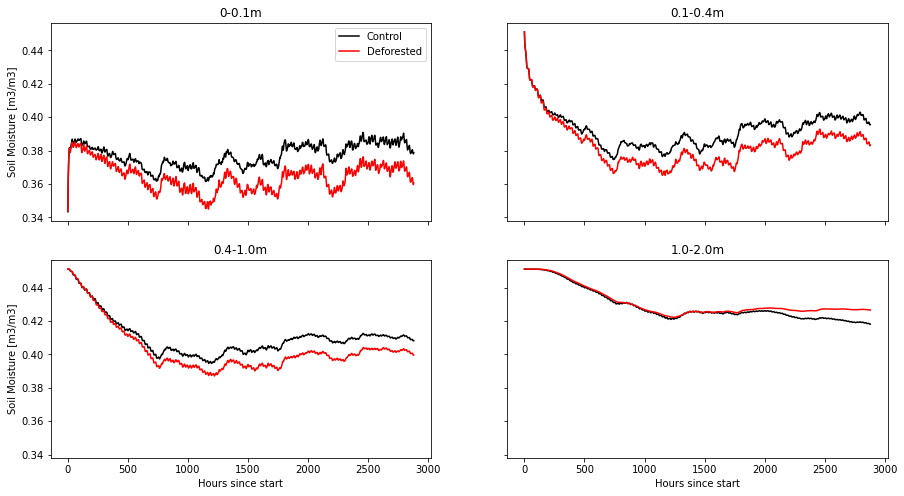

In [11]:
fig,axes = plt.subplots(2,2,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
titles=['0-0.1m','0.1-0.4m','0.4-1.0m','1.0-2.0m']
for ii in range(4):
    axes[ii].plot(smois0_areaave[:,ii],'k',label='Control')
    axes[ii].plot(smois1_areaave[:,ii],'r',label='Deforested')
    axes[ii].set_title(titles[ii])
axes[0].legend()
axes[2].set_xlabel('Hours since start')
axes[3].set_xlabel('Hours since start')
axes[0].set_ylabel('Soil Moisture [m3/m3]')
axes[2].set_ylabel('Soil Moisture [m3/m3]')

### Soil moisture

ok


<ipython-input-83-b578299b01ef>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1['SMOIS'][600+ii*5,0,:,:],cmap='coolwarm',vmin=-0.1,vmax=0.1


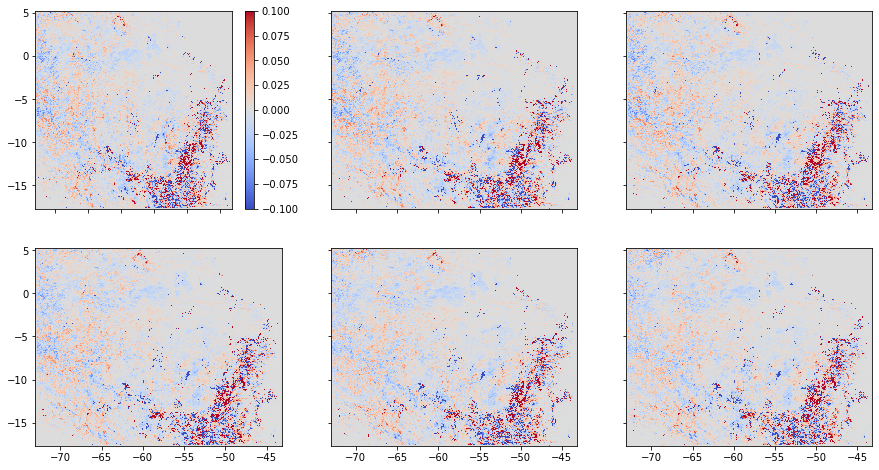

In [83]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'

with xarray.open_dataset(path+'Amazon_NoahMP_dveg9_201407_ILgrassland/dif_LAND.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['SMOIS']


for ii in range(6):
    img = axes[ii].pcolormesh(lons,lats,ds1['SMOIS'][600+ii*5,0,:,:],cmap='coolwarm',vmin=-0.1,vmax=0.1
                         )
fig.colorbar(img,ax=axes[0])
#axes[ii].contour(lons,lats,lu1,levels=[5])

In [ ]:
### TSK for both noon and night
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
img = axes[0].contourf(lons,lats,ds0['TSK'].mean('Time')-273.15,cmap='rainbow',
                             levels=np.arange(20,51,1),extend='both')
fig.colorbar(img,ax=axes[0])
axes[0].set_title('TSK at local noon')
### local night
img = axes[1].contourf(lons,lats,ds1['TSK'].mean('Time')-273.15,cmap='rainbow',
                             levels=np.arange(20,31,1),extend='both')
fig.colorbar(img,ax=axes[1])
axes[ii].set_title('TSK at local night')

ok


Text(0.5, 1.0, 'TSK at local night')

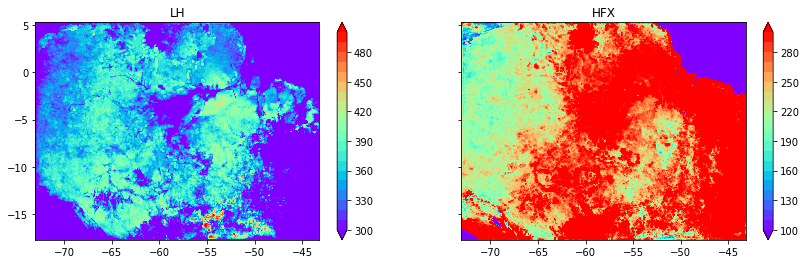

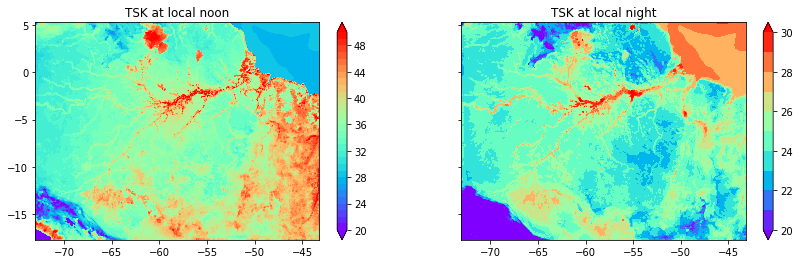

In [17]:
### Default NOAH_MP
with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.2015.obs.NoahMP.multidaymean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
    
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX','TSK','ALBEDO']
levs=[np.arange(300,501,10),np.arange(100,301,10),np.arange(20,51,1)]

for ii in range(2):
    img = axes[ii].contourf(lons,lats,ds0[varname[ii]][15,:,:],cmap='rainbow',
                             levels=levs[ii],extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    #axes[ii].contour(lons,lats,lu1,levels=[5])

### TSK for both noon and night
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
img = axes[0].contourf(lons,lats,ds0['TSK'][15,:,:]-273.15,cmap='rainbow',
                             levels=np.arange(20,51,1),extend='both')
fig.colorbar(img,ax=axes[0])
axes[0].set_title('TSK at local noon')
### local night
img = axes[1].contourf(lons,lats,ds0['TSK'][5,:,:]-273.15,cmap='rainbow',
                             levels=np.arange(20,31,1),extend='both')
fig.colorbar(img,ax=axes[1])
axes[ii].set_title('TSK at local night')    

ok


Text(0.5, 1.0, 'TSK at local night')

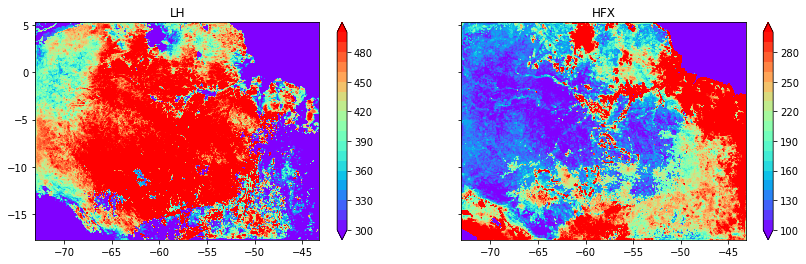

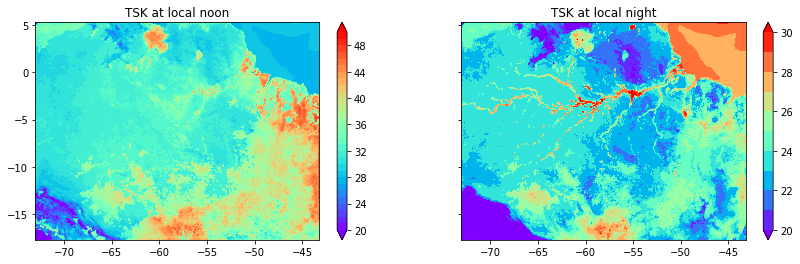

In [18]:
#### CLM4 
with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.201511.obs.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
    
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX','TSK','ALBEDO']
levs=[np.arange(300,501,10),np.arange(100,301,10),np.arange(20,51,1)]

for ii in range(2):
    img = axes[ii].contourf(lons,lats,ds0[varname[ii]][15,:,:],cmap='rainbow',
                             levels=levs[ii],extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    #axes[ii].contour(lons,lats,lu1,levels=[5])

### TSK for both noon and night
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
img = axes[0].contourf(lons,lats,ds0['TSK'][15,:,:]-273.15,cmap='rainbow',
                             levels=np.arange(20,51,1),extend='both')
fig.colorbar(img,ax=axes[0])
axes[0].set_title('TSK at local noon')
### local night
img = axes[1].contourf(lons,lats,ds0['TSK'][5,:,:]-273.15,cmap='rainbow',
                             levels=np.arange(20,31,1),extend='both')
fig.colorbar(img,ax=axes[1])
axes[ii].set_title('TSK at local night')    

ok
ok


<ipython-input-6-2c93235d98cf>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-6-2c93235d98cf>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-6-2c93235d98cf>:21: MatplotlibDeprecationWarning: shading='flat' when

Text(0.5, 0.98, 'Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

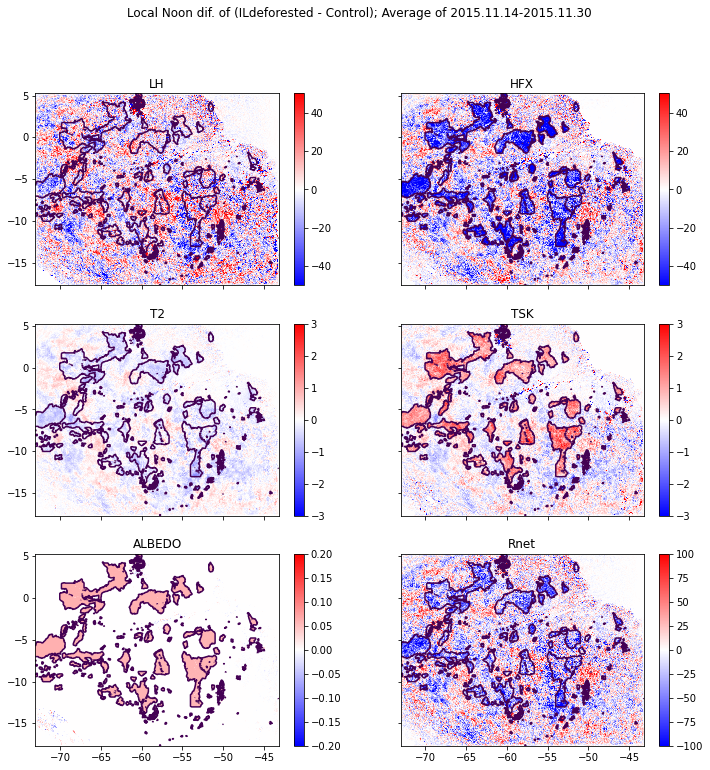

In [6]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
#with xarray.open_dataset(path+'Amazon/energyflux_d01_2015-11-01_15:00:00',decode_times=False,
with xarray.open_dataset(path+'Amazon_NoahMP_dveg9/energyflux_d01_201511_15UTC.obs.multidaymean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

#with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.201511.obs.nc',decode_times=False,
 #                        mask_and_scale='True') as ds0:
with xarray.open_dataset(path+'Amazon_NoahMP_dveg9_ILgrassland/energyflux_d01_201511_15UTC.ILgrassland.multidaymean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
    
fig,axes = plt.subplots(3,2,figsize=(12,12),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX','T2','TSK','ALBEDO']

vmins=[-50,-50,-3,-3,-0.2,-100]
vmaxs=[50,50,3,3,0.2,100]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(5):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
                             vmin=vmins[ii],vmax=vmaxs[ii])
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])
    
## plot Rnet
Rnet0 = ds0['LH'] + ds0['HFX']
Rnet1 = ds1['LH'] + ds1['HFX']

img = axes[5].pcolormesh(lons,lats,Rnet1.mean('Time')-Rnet0.mean('Time'),vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')

fig.colorbar(img,ax=axes[5])
axes[5].set_title('Rnet')
axes[5].contour(lons,lats,lu1-lu0,levels=[1,10])    

plt.suptitle('Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

## Diurnal cycle

In [53]:
dif = ds1[varname[ii]] - ds0[varname[ii]]
dif_lu = lu1-lu0
dif_forests = dif.where(dif_lu>0)
diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
diurnal_west = dif_forests[0,100:,:200].mean(('south_north','west_east'))
#plt.contourf(dif_forests)


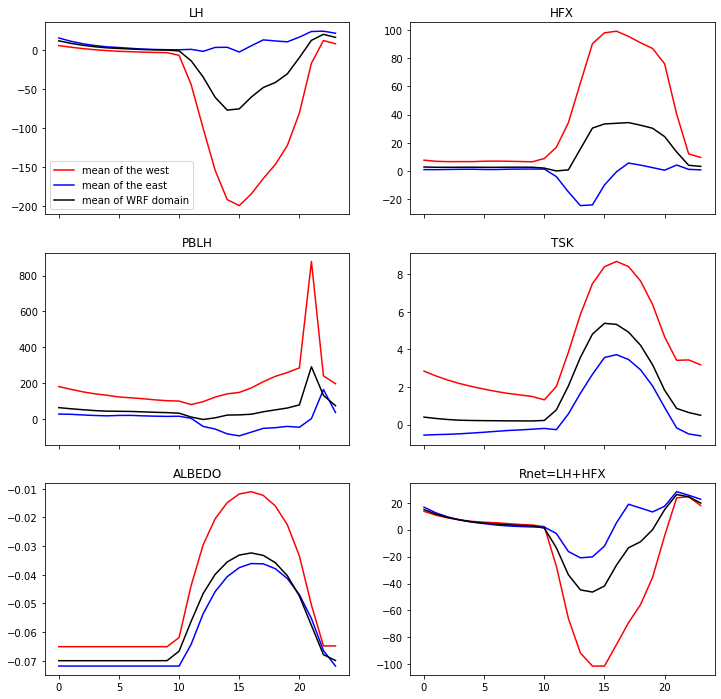

In [70]:
fig,axes = plt.subplots(3,2,figsize=(12,12),sharex=True)
axes = axes.ravel()  
varname = ['LH','HFX','PBLH','TSK','ALBEDO','Rnet=LH+HFX']
for ii in range(5):
    dif = ds1[varname[ii]] - ds0[varname[ii]]
    dif_lu = lu1-lu0
    dif_forests = dif.where(dif_lu>0)
    diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
    diurnal_west = dif_forests[:,100:,:200].mean(('south_north','west_east'))
    diurnal_all = dif_forests.mean(('south_north','west_east'))

    
    axes[ii].plot(range(24),diurnal_north,'-r',label='mean of the west')
    axes[ii].plot(range(24),diurnal_west,'-b',label='mean of the east')
    axes[ii].plot(range(24),diurnal_all,'-k',label='mean of WRF domain')

    axes[ii].set_title(varname[ii])
    
axes[0].legend()
   
## plot Rnet
dif_Rnet = ds1['LH'] + ds1['HFX'] - (ds0['LH'] + ds0['HFX'])
dif_forests = dif_Rnet.where(dif_lu>0)
diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
diurnal_west = dif_forests[:,100:,:200].mean(('south_north','west_east'))
diurnal_all = dif_forests.mean(('south_north','west_east'))
axes[5].plot(range(24),diurnal_north,'-r')
axes[5].plot(range(24),diurnal_west,'-b')
axes[5].plot(range(24),diurnal_all,'-k')
axes[5].set_title(varname[5])

